# Lab 1 Report

In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(filename): # Function to read in the filename in the data folder and show the image of the fits file
    arr = fits.getdata(filename)
    hdr = fits.open(filename)
    hdr.info()
    hdr.close()
    plt.imshow(arr, cmap='gray', origin='lower')
    plt.title(filename)
    plt.xlabel('pixels(x)')
    plt.ylabel('pixels(y)')
    plt.show()

def get_data(filename): # Function for getting and displaying the info of the fits file
    hdr = fits.open(filename)
    return hdr[0].header['object'], hdr[0].data, hdr.close()

def mean_std(filename): # Function for computing the mean and the standard deviation of the current fits file data
    arr = fits.getdata(filename)
    x = arr.flatten()
    m1 = np.sum(x)/np.size(x) # <x> = mean
    m2 = np.sum(x**2)/np.size(x) # <x^2>
    m12 = np.absolute(m2-m1**2) # Absolute value of <x^2> - <x>^2
    std = np.sqrt(m12) # square root of <x^2> - <x>^2
    print("mean:", m1)
    print("standard deviation:", std)

def histogram(array,hmin=None, hmax=None, title=None): # Function for creating a histogram of the desired filename
    array = []
    fig, ax = plt.subplots()
    for i in range(43,75): # fetches the filenames every 5 files for the 9 different exposure times
        filename = 'Lab1_data/d20%d.fits'%(i)
        arr = fits.getdata(filename) # stores the filename in an array
        #hdr = fits.open(filename) # opens the file and gets the info of each
        x = arr.flatten()
        if hmin is None:
            hmin = x.min()
        if hmax is None:
            hmax = x.max()
         # initialize bins and empty count arr
        hr = np.arange(hmin, hmax + 1)
        hist = np.zeros(hmax - hmin + 1, dtype=int)
        # count each value in bins
        for value in x:
            if hmin < value < hmax:
                hist[value - hmin] += 1

        ax.plot(hr,hist)
        ax.set_xlim([0,40000])
        #ax.set_ylim([0,100000])
        plt.xlabel('counts(ADU)')
        plt.ylabel('frequency')
    plt.show()



Filename: Lab1_data/d2085.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     157   (1056, 1024)   int16 (rescales to uint16)   


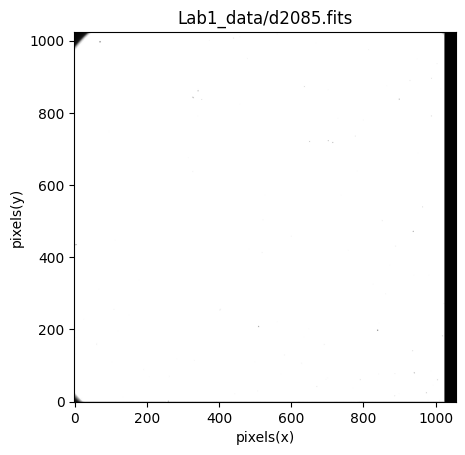

mean: 63487.85912808505
standard deviation: 63487.85011474623


KeyboardInterrupt: 

In [7]:
read_image("Lab1_data/d2085.fits")
get_data("Lab1_data/d2085.fits")
mean_std("Lab1_data/d2085.fits")
histogram("Lab1_data/d2085.fits")

In [32]:
get_data("Lab1_data/d2048.fits")



('flat',
 array([[1063, 1052, 1069, ..., 1018, 1025, 1016],
        [1113, 1092, 1096, ..., 1018, 1027, 1022],
        [1124, 1082, 1085, ..., 1023, 1027, 1017],
        ...,
        [1030, 1035, 1028, ..., 1020, 1007, 1018],
        [1035, 1035, 1037, ..., 1012, 1016, 1010],
        [1046, 1032, 1036, ..., 1003, 1004, 1014]],
       shape=(1024, 1056), dtype=uint16),
 None)

In [103]:
mean_std("Lab1_data/d2048.fits")

mean: 1946.376795913234
standard deviation: 1937.9232528893006


/var/folders/85/g1dhcfl16zj89wp16k8k6bym0000gn/T/ipykernel_83183/752519883.py:39: RuntimeWarning: overflow encountered in scalar add
  hr = np.arange(hmin, hmax + 1)
/var/folders/85/g1dhcfl16zj89wp16k8k6bym0000gn/T/ipykernel_83183/752519883.py:39: RuntimeWarning: overflow encountered in scalar subtract
  hr = np.arange(hmin, hmax + 1)


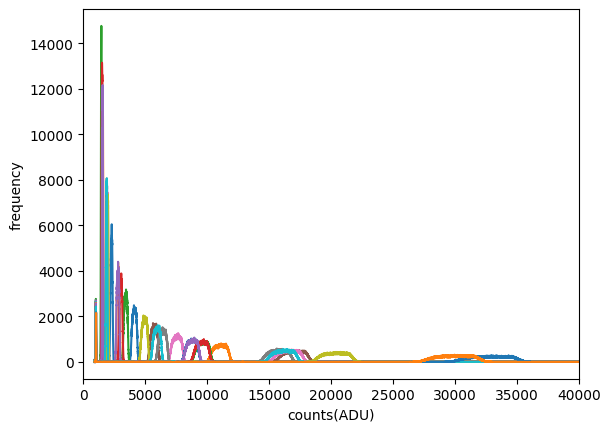

In [22]:
array = []
histogram(array)

In [2]:
def data(x):
    tot = []
    for i in range(43,85):
        filename = 'Lab1_data/d20%d.fits'%(i)
        arr = fits.getdata(filename)
        y = arr.flatten()
        #print(y)
        tot.append(y)
    return tot

In [ ]:
dat = []
dat = data(dat)
dat = np.array(dat)

In [36]:
def bias(x):
    r = range(32,42)
    n = len(r)
    tot = zeros(n)

    for i in r:
        filename = 'Lab1_data/d20%d.fits'%(i)
        arr = fits.getdata(filename)
        y = arr.flatten()
        tot[i-32] += y
    tot = np.array(tot)
    trans = np.transpose(tot)
    k = len(trans)
    mean = zeros(k)
    for i in range(0,len(trans)):
        m = np.mean(trans[i])
        mean[i] += m
    return mean
biasdat = []
biasdat = bias(biasdat)
biasdat

[np.float64(1030.1),
 np.float64(1030.1),
 np.float64(1028.4),
 np.float64(1031.8),
 np.float64(1029.2),
 np.float64(1029.2),
 np.float64(1027.7),
 np.float64(1028.0),
 np.float64(1029.1),
 np.float64(1029.6),
 np.float64(1029.7),
 np.float64(1030.2),
 np.float64(1028.0),
 np.float64(1028.7),
 np.float64(1033.6),
 np.float64(1029.0),
 np.float64(1029.2),
 np.float64(1028.3),
 np.float64(1030.4),
 np.float64(1030.7),
 np.float64(1030.4),
 np.float64(1033.2),
 np.float64(1031.2),
 np.float64(1030.1),
 np.float64(1031.7),
 np.float64(1032.1),
 np.float64(1034.9),
 np.float64(1031.0),
 np.float64(1028.2),
 np.float64(1030.3),
 np.float64(1032.8),
 np.float64(1030.0),
 np.float64(1032.6),
 np.float64(1032.5),
 np.float64(1031.9),
 np.float64(1030.8),
 np.float64(1028.7),
 np.float64(1031.7),
 np.float64(1029.7),
 np.float64(1028.3),
 np.float64(1030.6),
 np.float64(1032.0),
 np.float64(1032.7),
 np.float64(1029.8),
 np.float64(1032.0),
 np.float64(1029.4),
 np.float64(1031.2),
 np.float64(1

In [3]:
def zeros(n):
    return [0] * n

In [52]:
def mean(x): # take an empty array and spit out an array with the mean counts of one image of each exposure time
    r = range(43,85)
    n = len(r)
    tot = zeros(n)
    #x = []
    #x = data(x)
    for i in r: # fetches the filenames every 5 files for the 9 different exposure times
        filename = 'Lab1_data/d20%d.fits'%(i)
        arr = fits.getdata(filename)
        y = arr.flatten() # flattens the array so that we can sum over the elements
        y[i-43] -= biasdat[i]
        m = np.sum(y)/np.size(y)
        tot[i-43] += m
    tot = np.array(tot) # make the output a numpy array
    return tot

In [53]:
xbar = []
xbar = mean(xbar)
xbar

array([ 2309.61410153,  1622.52848585,  1508.84808904,  1561.65810972,
        1608.62878048,  1946.37584062,  2001.35447924,  1926.79029523,
        2008.27483576,  1927.34022568,  4096.26003289,  2830.31313717,
        3421.30247914,  3028.87842722,  2810.91977946,  5635.02411074,
        7416.96181141,  6303.50464237,  4888.66671013,  5863.41709484,
        8585.34808997, 10799.54066051,  9431.12617724,  9370.03913186,
        8616.56192664, 16590.81449936, 16170.44618734, 15333.20070764,
       19810.39815267, 15759.73233125, 31892.60861668, 29083.66871412,
       29139.97324533, 34104.94425271, 35084.19264637, 63463.1283033 ,
       63451.38147897, 63457.603302  , 63368.43283636, 63219.27259688,
       63508.39332904, 63495.05549483])

In [49]:
def std(x): # take an empty array and spit out an array with the mean counts of one image of each exposure time
    r = range(43,85)
    n = len(r)
    tot = zeros(n)
    for i in r: # fetches the filenames every 5 files for the 9 different exposure times
        filename = 'Lab1_data/d20%d.fits'%(i)
        arr = fits.getdata(filename)
        y = arr.flatten() # flattens the array so that we can sum over the elements
        y[i-43] -= biasdat[i]
        m = np.sum(y)/np.size(y)
        for j in y:
            tot[i-43] += ((j-m)**2)/len(y)
    tot = np.sqrt(tot)
    return tot

In [ ]:
s = []
s = std(s)
s

In [46]:
y = xbar.flatten()
mom = np.sum(y)/np.size(y)
print(mom)

18594.121080265486


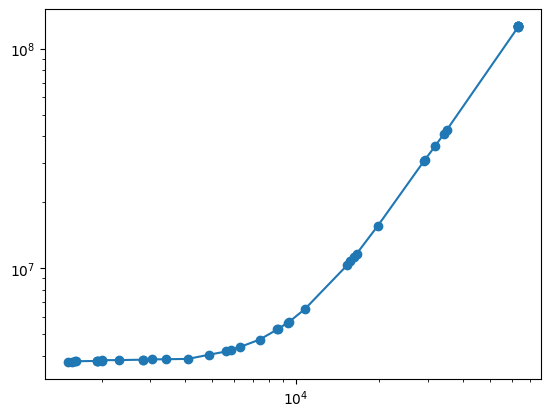

In [56]:
fig, ax = plt.subplots()
xbar.sort()
s.sort()
ax.plot(xbar,s**2,'-o')
#ax.plot(xline,yline,'-')
plt.yscale('log')
plt.xscale('log')
plt.show()